In [1]:
# https://www.kaggle.com/shivamkushwaha/bbc-full-text-document-classification
!wget -nc https://lazyprogrammer.me/course_files/nlp/bbc_text_cls.csv

--2023-07-08 18:27:44--  https://lazyprogrammer.me/course_files/nlp/bbc_text_cls.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 104.21.23.210, 172.67.213.166, 2606:4700:3031::6815:17d2, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|104.21.23.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5085081 (4.8M) [text/csv]
Saving to: ‘bbc_text_cls.csv’

bbc_text_cls.csv    100%[===================>]   4.85M  6.05MB/s    in 0.8s    

2023-07-08 18:27:45 (6.05 MB/s) - ‘bbc_text_cls.csv’ saved [5085081/5085081]



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
import tensorflow as tf
from tensorflow.keras.layers import Dense,Input,GlobalMaxPooling1D
from tensorflow.keras.models import Model
from tensorflow.keras.layers import MaxPooling1D,Conv1D,Embedding
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

In [6]:
df=pd.read_csv('bbc_text_cls.csv')

In [7]:
df.head()

,text,labels
0,Ad sales boost Time Warner profit\n\nQuarterly...,business
1,Dollar gains on Greenspan speech\n\nThe dollar...,business
2,Yukos unit buyer faces loan claim\n\nThe owner...,business
3,High fuel prices hit BA's profits\n\nBritish A...,business
4,Pernod takeover talk lifts Domecq\n\nShares in...,business


In [8]:
df['target']=df['labels'].astype('category').cat.codes
df['target']

0       0
1       0
2       0
3       0
4       0
       ..
2220    4
2221    4
2222    4
2223    4
2224    4
Name: target, Length: 2225, dtype: int8

<Axes: >

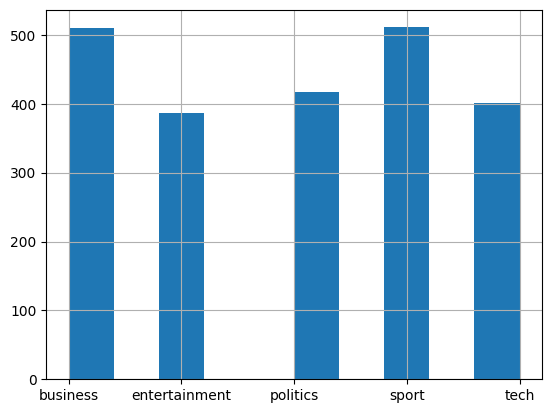

In [9]:
df['labels'].hist()

In [10]:
k=df['target'].max()+1
k

5

In [11]:
from sklearn.model_selection import train_test_split
df_train,df_test=train_test_split(df,test_size=0.3,random_state=0)

In [12]:
df_train.head()

,text,labels,target
1771,Federer breezes into semi-finals\n\nRoger Fede...,sport,3
997,Blunkett row should end - Blair\n\nPrime Minis...,politics,2
122,Train strike grips Buenos Aires\n\nA strike on...,business,0
861,Vera Drake's Bafta triumph hope\n\nAt the Baft...,entertainment,1
214,SEC to rethink post-Enron rules\n\nThe US stoc...,business,0


In [13]:
df_test.head()

,text,labels,target
384,Tate & Lyle boss bags top award\n\nTate & Lyle...,business,0
1983,Halo 2 sells five million copies\n\nMicrosoft ...,tech,4
985,MSPs hear renewed climate warning\n\nClimate c...,politics,2
1386,Pavey focuses on indoor success\n\nJo Pavey wi...,sport,3
1294,Tories reject rethink on axed MP\n\nSacked MP ...,politics,2


In [19]:
MAX_VOCAB_SIZE=2000
tokenizer=Tokenizer(num_words=MAX_VOCAB_SIZE)
tokenizer.fit_on_texts(df_train['text'])
sequences_train=tokenizer.texts_to_sequences(df_train['text'])
sequences_test=tokenizer.texts_to_sequences(df_test['text'])

In [ ]:
sequences_train

In [ ]:
sequences_test

In [24]:
word2idx=tokenizer.word_index
v=len(word2idx)
print('no of unique tokens are:')
v

no of unique tokens are:


27489

In [25]:
data_train=pad_sequences(sequences_train) #padding sequences so that we get a N X T Matrix
print(data_train.shape)                   #shape of the data_train tensor
T=data_train.shape[1]                     #getting the sequence length
data_test=pad_sequences(sequences_test, maxlen=T)
print(data_test.shape)

(1557, 2831)
(668, 2831)


In [26]:
D=50
i=Input(shape=(T,))
x=Embedding(v+1,D)(i)
x=Conv1D(32,3,activation='relu')(x)
x=MaxPooling1D(3)(x)
x=Conv1D(64,3,activation='relu')(x)
x=MaxPooling1D(3)(x)
x=Conv1D(128,3,activation='relu')(x)
x=GlobalMaxPooling1D()(x)
x=Dense(k)(x)

model=Model(i,x)

In [27]:
model.compile(loss=SparseCategoricalCrossentropy(from_logits=True),optimizer='adam',metrics=['accuracy'])

In [28]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 2831)]            0         
                                                                 
 embedding (Embedding)       (None, 2831, 50)          1374500   
                                                                 
 conv1d (Conv1D)             (None, 2829, 32)          4832      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 943, 32)          0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 941, 64)           6208      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 313, 64)          0         
 1D)                                                         

In [30]:
r=model.fit(data_train,df_train['target'],epochs=13,batch_size=128,validation_data=(data_test,df_test['target']))

Epoch 1/13
13/13 [==============================] - 16s 1s/step - loss: 6.5196e-04 - accuracy: 1.0000 - val_loss: 0.3582 - val_accuracy: 0.9147
Epoch 2/13
13/13 [==============================] - 16s 1s/step - loss: 6.0296e-04 - accuracy: 1.0000 - val_loss: 0.3604 - val_accuracy: 0.9147
Epoch 3/13
13/13 [==============================] - 14s 1s/step - loss: 5.6279e-04 - accuracy: 1.0000 - val_loss: 0.3619 - val_accuracy: 0.9132
Epoch 4/13
13/13 [==============================] - 16s 1s/step - loss: 5.2466e-04 - accuracy: 1.0000 - val_loss: 0.3633 - val_accuracy: 0.9132
Epoch 5/13
13/13 [==============================] - 14s 1s/step - loss: 4.9175e-04 - accuracy: 1.0000 - val_loss: 0.3653 - val_accuracy: 0.9117
Epoch 6/13
13/13 [==============================] - 14s 1s/step - loss: 4.6199e-04 - accuracy: 1.0000 - val_loss: 0.3675 - val_accuracy: 0.9132
Epoch 7/13
13/13 [==============================] - 14s 1s/step - loss: 4.3196e-04 - accuracy: 1.0000 - val_loss: 0.3666 - val_accuracy:

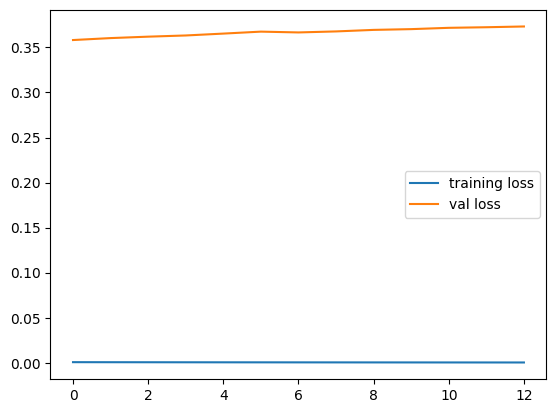

In [31]:
plt.plot(r.history['loss'],label='training loss')
plt.plot(r.history['val_loss'],label='val loss')
plt.legend()

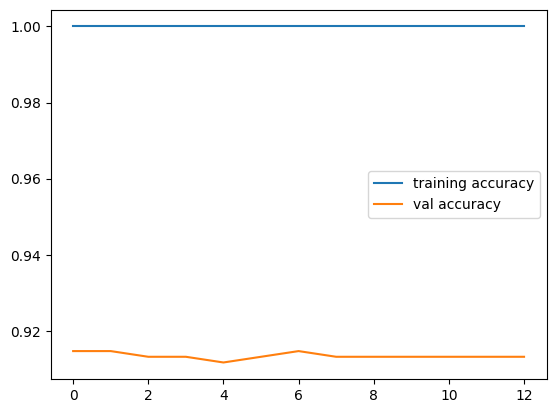

In [32]:
plt.plot(r.history['accuracy'],label='training accuracy')
plt.plot(r.history['val_accuracy'],label='val accuracy')
plt.legend()